#Prediction of Delivery Duration

Import all the libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Read CSV File using Pandas

In [ ]:
df = pd.read_csv('/content/historical_data.csv')

#**Profile of Data (Basic Analysis of Data)**

In [ ]:
df.shape

(197428, 16)

In [ ]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_rider,total_busy_rider,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2/6/2015 22:24,2/6/2015 23:27,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2/10/2015 21:49,2/10/2015 22:56,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,1/22/2015 20:39,1/22/2015 21:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2/3/2015 21:21,2/3/2015 22:13,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2/15/2015 2:40,2/15/2015 3:20,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [ ]:
df.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_rider,total_busy_rider,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


In [ ]:
df.isnull().sum()

,0
market_id,987
created_at,0
actual_delivery_time,7
store_id,0
store_primary_category,4760
order_protocol,995
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0


In [ ]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_rider', 'total_busy_rider', 'total_outstanding_orders',
       'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

Convert 'created at' and 'actual delivery time' to date type

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [ ]:
df.dtypes

,0
market_id,float64
created_at,datetime64[ns]
actual_delivery_time,datetime64[ns]
store_id,int64
store_primary_category,object
order_protocol,float64
total_items,int64
subtotal,int64
num_distinct_items,int64
min_item_price,int64


#Feature Creation

In [ ]:
#Create the target variable for regression
df['final_delivery_time'] = df['actual_delivery_time'] - df['created_at']

In [ ]:
#Find out rider ratio for the availability
df['busy_rider_ratio'] = df['total_busy_rider'] / df['total_onshift_rider']

In [ ]:
#Find out estimated non prepration duration
df['estimated_non_prep_duration'] = df['estimated_order_place_duration'] + df['estimated_store_to_consumer_driving_duration']

In [ ]:
#Check ids and decide whether to encode or not (categorical feature analysis and encoding for model)

In [ ]:
df['market_id'].nunique()

6

In [ ]:
df['store_id'].nunique()

6743

In [ ]:
df['order_protocol'].nunique()

7

In [ ]:
#Create dummies for order protocol
order_protocol_dummies = pd.get_dummies(df.order_protocol).astype(int )
order_protocol_dummies = order_protocol_dummies.add_prefix('order_protocol_')
order_protocol_dummies.head()


,order_protocol_1.0,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [ ]:
#Create dummies for market id
market_id_dummies = pd.get_dummies(df.market_id).astype(int )
market_id_dummies = market_id_dummies.add_prefix('market_id_')
market_id_dummies.head()

,market_id_1.0,market_id_2.0,market_id_3.0,market_id_4.0,market_id_5.0,market_id_6.0
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [ ]:
#Create dictinary with most repeated categories of each store to fill null rows where it is possibel
store_id_unique = df['store_id'].unique().tolist()
store_id_and_category = {store_id : df[df.store_id == store_id].store_primary_category.mode()
                         for store_id in store_id_unique}


In [ ]:
def fill(store_id):
  try:
    return store_id_and_category[store_id].values[0]
  except:
    return np.nan

#Fill null value
df['nan_free_store_primary_category'] = df.store_id.apply(fill)

In [ ]:
#Crete dummies for store primary category
store_primary_category_dummies = pd.get_dummies(df.nan_free_store_primary_category).astype(int )
store_primary_category_dummies = store_primary_category_dummies.add_prefix('category_')
store_primary_category_dummies.head()



,category_afghan,category_african,category_alcohol,category_alcohol-plus-food,category_american,category_argentine,category_asian,category_barbecue,category_belgian,category_brazilian,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Drop created at, market id, store id, store primary category, actual delievery time, actual total delievry duration
train_df = df.drop(columns = ['created_at','market_id','store_id','store_primary_category','actual_delivery_time', 'nan_free_store_primary_category', 'order_protocol'])
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_rider,total_busy_rider,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,final_delivery_time,busy_rider_ratio,estimated_non_prep_duration
0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,0 days 01:03:00,0.424242,1307.0
1,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,0 days 01:07:00,2.000000,1136.0
2,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,0 days 00:30:00,0.000000,1136.0
3,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,0 days 00:52:00,1.000000,735.0
4,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,0 days 00:40:00,1.000000,1096.0


In [ ]:
#concatinate the data
train_df = pd.concat([train_df, order_protocol_dummies, market_id_dummies, store_primary_category_dummies], axis = 1)

In [ ]:
# Identify columns with timedelta values
timedelta_cols = train_df.select_dtypes(include=['timedelta64[ns]']).columns

# Convert timedelta values to numeric (e.g., seconds)
for col in timedelta_cols:
    train_df[col] = train_df[col].dt.total_seconds()

# Now try converting the entire DataFrame to float32
train_df = train_df.astype("float32")
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_rider,total_busy_rider,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,861.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,446.0,690.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,446.0,289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0,446.0,650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_df.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_rider,total_busy_rider,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
count,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000,...,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000
mean,3.196391,2682.331543,2.670791,686.218506,1159.588623,44.808094,41.739746,58.050064,308.560181,545.358948,...,0.000815,0.000187,0.005465,0.011300,0.000740,0.037254,0.001175,0.001433,0.004234,0.030928
std,2.666546,1823.093750,1.630255,522.038635,558.411377,34.526787,32.145733,52.661831,90.139648,219.352905,...,0.028545,0.013689,0.073725,0.105701,0.027184,0.189384,0.034260,0.037834,0.064935,0.173122
min,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_df['busy_rider_ratio'].describe()

,busy_rider_ratio
count,1.775900e+05
mean,NaN
std,NaN
min,-inf
25%,8.269231e-01
50%,9.622642e-01
75%,1.000000e+00
max,inf


In [ ]:
#Check infinity values with using numpy isfinite() function
np.where(np.any(~np.isfinite(train_df), axis=0) == True)

(array([ 5,  6,  7,  9, 10, 11, 12]),)

In [ ]:
#Replace inf value with nan to drop all nans
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)

#Drop all nans
train_df.dropna(inplace=True)

In [ ]:
train_df.shape

(177070, 100)

#Collinearity and Removing Redundancies

In [ ]:
#Generate a mask for the upper triangle because of symmetry
corr = train_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

<Axes: >

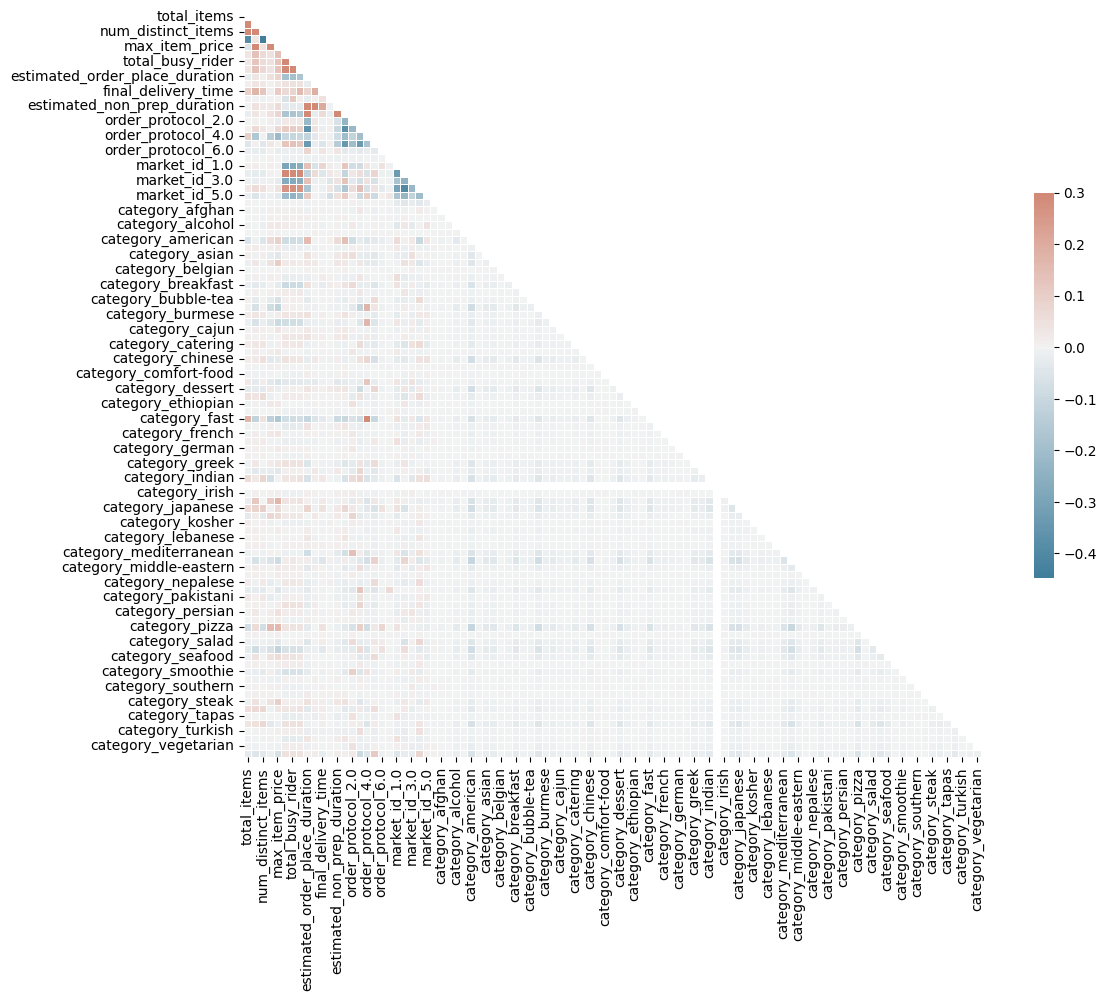

In [ ]:
#Create headmap
f, ax = plt.subplots(figsize = (12,10))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

In [ ]:
train_df['category_indonesian'].describe()

,category_indonesian
count,177070.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


Get Redundant Pairs

In [ ]:
def get_redundant_pairs(df):
  pairs_to_drop = set()
  cols = df.columns
  for i in range(0, df.shape[1]):
    for j in range(0, i+1):
      pairs_to_drop.add((cols[i], cols[j]))
  return pairs_to_drop

In [ ]:
def get_top_abs_correlations(df, n = 5):
  au_corr = df.corr().abs().unstack()
  labels_to_drop = get_redundant_pairs(df)
  au_corr = au_corr.drop(labels = labels_to_drop).sort_values(ascending = False)
  return au_corr[0:n]

In [ ]:
get_top_abs_correlations(train_df, 20)

total_onshift_rider                           total_busy_rider               0.941741
                                              total_outstanding_orders       0.934639
total_busy_rider                              total_outstanding_orders       0.931295
estimated_store_to_consumer_driving_duration  estimated_non_prep_duration    0.923086
estimated_order_place_duration                order_protocol_1.0             0.897645
total_items                                   num_distinct_items             0.758146
subtotal                                      num_distinct_items             0.682890
total_items                                   subtotal                       0.557175
min_item_price                                max_item_price                 0.541241
subtotal                                      max_item_price                 0.507947
order_protocol_4.0                            category_fast                  0.489946
num_distinct_items                            min_item_price                 0.446733
market_id_2.0                                 market_id_4.0                  0.402421
total_items                                   min_item_price                 0.389277
order_protocol_1.0                            order_protocol_3.0             0.373581
estimated_order_place_duration                order_protocol_3.0             0.364170
                                              estimated_non_prep_duration    0.363297
order_protocol_1.0                            order_protocol_5.0             0.342345
market_id_1.0                                 market_id_2.0                  0.334580
estimated_order_place_duration                order_protocol_5.0             0.333291
dtype: float64

In [ ]:
#Drop Columns
train_df = df.drop(columns = ['created_at','market_id','store_id','store_primary_category','actual_delivery_time', 'nan_free_store_primary_category', 'order_protocol'])

In [ ]:
train_df = pd.concat([train_df, order_protocol_dummies, store_primary_category_dummies], axis = 1)

Drop highly correlated features

In [ ]:
train_df = train_df.drop(columns = ['total_onshift_rider', 'total_busy_rider', 'category_indonesian', 'estimated_non_prep_duration'])

In [ ]:
# Identify columns with timedelta values
timedelta_cols = train_df.select_dtypes(include=['timedelta64[ns]']).columns

# Convert timedelta values to numeric (e.g., seconds)
for col in timedelta_cols:
    train_df[col] = train_df[col].dt.total_seconds()

# Now try converting the entire DataFrame to float32
train_df = train_df.astype("float32")

In [ ]:
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)

In [ ]:
train_df.head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,final_delivery_time,busy_rider_ratio,...,category_southern,category_spanish,category_steak,category_sushi,category_tapas,category_thai,category_turkish,category_vegan,category_vegetarian,category_vietnamese
0,4.0,3441.0,4.0,557.0,1239.0,21.0,446.0,861.0,3780.0,0.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1900.0,1.0,1400.0,1400.0,2.0,446.0,690.0,4020.0,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1900.0,1.0,1900.0,1900.0,0.0,446.0,690.0,1800.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6.0,6900.0,5.0,600.0,1800.0,2.0,446.0,289.0,3120.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3900.0,3.0,1100.0,1600.0,9.0,446.0,650.0,2400.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_df.shape

(177070, 90)

Check again

In [ ]:
def get_top_abs_correlations(df, n = 5):
  au_corr = df.corr().abs().unstack()
  labels_to_drop = get_redundant_pairs(df)
  au_corr = au_corr.drop(labels = labels_to_drop).sort_values(ascending = False)
  return au_corr[0:n]

get_top_abs_correlations(train_df, 20)

,,0
estimated_order_place_duration,order_protocol_1.0,0.897645
total_items,num_distinct_items,0.758146
subtotal,num_distinct_items,0.682890
total_items,subtotal,0.557175
min_item_price,max_item_price,0.541241
subtotal,max_item_price,0.507947
order_protocol_4.0,category_fast,0.489946
num_distinct_items,min_item_price,0.446733
total_items,min_item_price,0.389277
order_protocol_1.0,order_protocol_3.0,0.373581


In [ ]:
#Drop Columns
train_df = df.drop(columns = ['created_at','market_id','store_id','store_primary_category','actual_delivery_time', 'nan_free_store_primary_category', 'order_protocol'])

train_df = pd.concat([train_df, store_primary_category_dummies], axis = 1)

train_df = train_df.drop(columns = ['total_onshift_rider', 'total_busy_rider', 'category_indonesian', 'estimated_non_prep_duration'])

# Identify columns with timedelta values
timedelta_cols = train_df.select_dtypes(include=['timedelta64[ns]']).columns

# Convert timedelta values to numeric (e.g., seconds)
for col in timedelta_cols:
    train_df[col] = train_df[col].dt.total_seconds()

# Now try converting the entire DataFrame to float32
train_df = train_df.astype("float32")

train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)


get_top_abs_correlations(train_df, 20)


,,0
total_items,num_distinct_items,0.758146
subtotal,num_distinct_items,0.682890
total_items,subtotal,0.557175
min_item_price,max_item_price,0.541241
subtotal,max_item_price,0.507947
num_distinct_items,min_item_price,0.446733
total_items,min_item_price,0.389277
estimated_store_to_consumer_driving_duration,final_delivery_time,0.188316
subtotal,final_delivery_time,0.172275
total_outstanding_orders,estimated_order_place_duration,0.171049


#Feature Engineering

In [ ]:
#new feature
train_df['percentage_distinct_item_of_total'] = train_df['num_distinct_items'] / train_df['total_items']
train_df['avg_price_per_item'] = train_df['subtotal'] / train_df['total_items']
train_df.drop(columns = ['num_distinct_items', 'subtotal'], inplace = True)

get_top_abs_correlations(train_df, 20)

min_item_price                                avg_price_per_item                   0.860580
max_item_price                                avg_price_per_item                   0.770382
min_item_price                                max_item_price                       0.541241
total_items                                   percentage_distinct_item_of_total    0.445751
                                              min_item_price                       0.389277
                                              avg_price_per_item                   0.310759
percentage_distinct_item_of_total             avg_price_per_item                   0.226711
category_pizza                                avg_price_per_item                   0.225510
estimated_store_to_consumer_driving_duration  final_delivery_time                  0.188316
max_item_price                                percentage_distinct_item_of_total    0.178021
category_fast                                 avg_price_per_item                   0.175950
min_item_price                                percentage_distinct_item_of_total    0.173524
total_outstanding_orders                      estimated_order_place_duration       0.171049
total_items                                   category_fast                        0.170988
max_item_price                                category_italian                     0.169775
                                              category_fast                        0.166169
category_italian                              avg_price_per_item                   0.158193
max_item_price                                category_pizza                       0.157577
total_outstanding_orders                      final_delivery_time                  0.157535
category_fast                                 percentage_distinct_item_of_total    0.153614
dtype: float64

In [ ]:
train_df['price_range_of_items'] = train_df['max_item_price'] - train_df['min_item_price']
train_df.drop(columns = ['max_item_price', 'min_item_price'], inplace = True)

get_top_abs_correlations(train_df, 20)

total_items                                   percentage_distinct_item_of_total    0.445751
                                              price_range_of_items                 0.333304
                                              avg_price_per_item                   0.310759
percentage_distinct_item_of_total             avg_price_per_item                   0.226711
category_pizza                                avg_price_per_item                   0.225510
estimated_store_to_consumer_driving_duration  final_delivery_time                  0.188316
category_fast                                 avg_price_per_item                   0.175950
total_outstanding_orders                      estimated_order_place_duration       0.171049
total_items                                   category_fast                        0.170988
category_italian                              avg_price_per_item                   0.158193
total_outstanding_orders                      final_delivery_time                  0.157535
category_fast                                 percentage_distinct_item_of_total    0.153614
estimated_order_place_duration                category_american                    0.150174
category_american                             category_pizza                       0.106998
estimated_order_place_duration                category_fast                        0.106739
category_american                             category_mexican                     0.106459
final_delivery_time                           price_range_of_items                 0.104720
category_burger                               avg_price_per_item                   0.104437
total_outstanding_orders                      price_range_of_items                 0.100228
category_mexican                              category_pizza                       0.097818
dtype: float64

In [ ]:
train_df.shape

(177070, 82)

#Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def compute_vif(features):
  vif_data = pd.DataFrame()
  vif_data['feature'] = features
  vif_data['VIF'] = [variance_inflation_factor(train_df[features].values, i) for i in range(len(features))]
  return vif_data.sort_values(by=['VIF']).reset_index(drop=True)

In [ ]:
#apply VIF
features = train_df.drop(columns = ['final_delivery_time']).columns.to_list()
vif_data = compute_vif(features)
vif_data

,feature,VIF
0,category_alcohol-plus-food,1.000371
1,category_chocolate,1.000498
2,category_belgian,1.000760
3,category_russian,1.003231
4,category_african,1.003823
...,...,...
76,busy_rider_ratio,6.369601
77,category_american,7.033604
78,estimated_store_to_consumer_driving_duration,7.210844
79,estimated_order_place_duration,13.472280


In [ ]:
#drop the feature whose VIF is greater than 20
multicollinearity = True

while multicollinearity:
  highest_vif_feature = vif_data['feature'].values.tolist()[-1]
  print("I will remove", highest_vif_feature)
  features.remove(highest_vif_feature)
  vif_data = compute_vif(features)
  multicollinearity = False if len(vif_data[vif_data['VIF'] > 20]) == 0 else True

selected_features = vif_data['feature'].values.tolist()
vif_data

I will remove percentage_distinct_item_of_total


,feature,VIF
0,category_alcohol-plus-food,1.000222
1,category_chocolate,1.000369
2,category_belgian,1.000461
3,category_russian,1.002022
4,category_gluten-free,1.002372
...,...,...
75,category_american,4.505928
76,avg_price_per_item,5.958972
77,busy_rider_ratio,6.357889
78,estimated_store_to_consumer_driving_duration,7.192644


#Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
X = train_df[selected_features]
y = train_df['final_delivery_time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

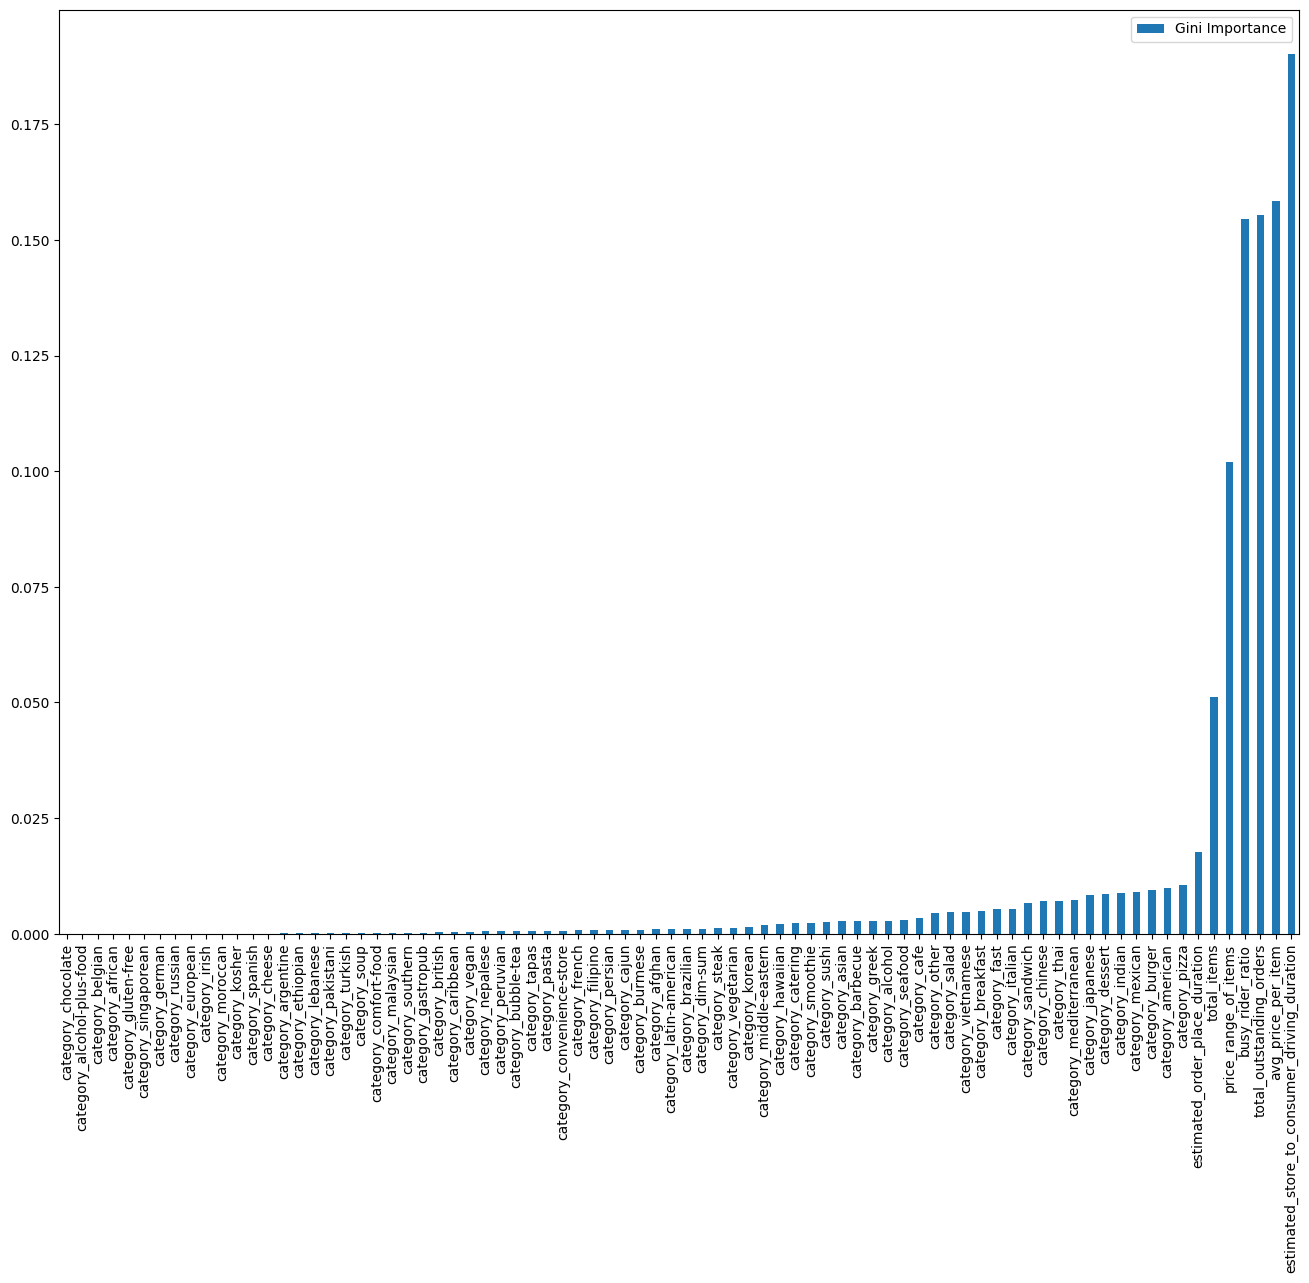

In [ ]:
#Check gini values
feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest = RandomForestRegressor(random_state = 42)
forest.fit(X_train, y_train)
feats = {}
for features, importance in zip(X.columns, forest.feature_importances_):
  feats[features] = importance
importances = pd.DataFrame.from_dict(feats, orient = 'index').rename(columns = {0: 'Gini Importance'})
importances.sort_values(by = 'Gini Importance').plot(kind = 'bar', rot = 90, figsize = (16,12))
plt.show()

In [ ]:
#we can obtain the column names as text (35)
importances.sort_values(by = 'Gini Importance')[-35:].index.tolist()

['category_middle-eastern',
 'category_hawaiian',
 'category_catering',
 'category_smoothie',
 'category_sushi',
 'category_asian',
 'category_barbecue',
 'category_greek',
 'category_alcohol',
 'category_seafood',
 'category_cafe',
 'category_other',
 'category_salad',
 'category_vietnamese',
 'category_breakfast',
 'category_fast',
 'category_italian',
 'category_sandwich',
 'category_chinese',
 'category_thai',
 'category_mediterranean',
 'category_japanese',
 'category_dessert',
 'category_indian',
 'category_mexican',
 'category_burger',
 'category_american',
 'category_pizza',
 'estimated_order_place_duration',
 'total_items',
 'price_range_of_items',
 'busy_rider_ratio',
 'total_outstanding_orders',
 'avg_price_per_item',
 'estimated_store_to_consumer_driving_duration']

#PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

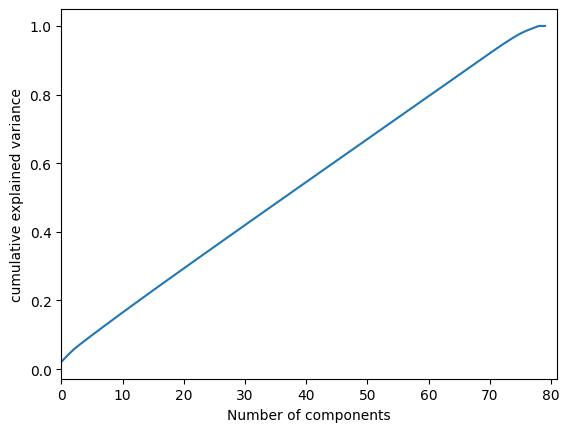

In [ ]:
X_Train = X_train.values
X_Train = np.asarray(X_Train)

X_std = StandardScaler().fit_transform(X_Train)
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,81,1)
plt.xlabel('Number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
def scale(scaler, X, y):
  X_scaler = scaler
  X_scaler.fit(X=X, y=y)
  X_scaled = X_scaler.transform(X)
  y_scaler = scaler
  y_scaler.fit(y.values.reshape(-1,1))
  y_scaled = y_scaler.transform(y.values.reshape(-1,1))

  return X_scaled, y_scaled, X_scaler, y_scaler

In [ ]:
#how to use
X_scaled, y_scaled, X_scaler, y_scaler = scale(MinMaxScaler(), X, y)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def rmse_with_inv_transform(scaler, y_test, y_pred_scaled, model_name):
  y_predict = scaler.inverse_transform(y_pred_scaled.reshape(-1,1))
  rmse_error = mean_squared_error(y_test, y_predict[:,0], squared = False)
  print("Error = "'{}'.format(rmse_error)+" in " + model_name)

  return rmse_error, y_predict


#Machine Learning

In [ ]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model

In [ ]:
#Create function which work with multiple machine model
def make_regression(X_train, y_train, X_test, y_test, model, model_name, verbose = True):
  model.fit(X_train, y_train)
  y_predict = model.predict(X_train)
  train_error = mean_squared_error(y_train, y_predict, squared = False)
  y_predict = model.predict(X_test)
  test_error = mean_squared_error(y_test, y_predict, squared = False)
  if verbose:
    print("Train Error = "'{}'.format(train_error)+" in " + model_name)
    print("Test Error = "'{}'.format(test_error)+" in " + model_name)
  trained_model = model

  return trained_model, y_predict, train_error, test_error

In [ ]:
pred_dict = {
    "regression_model" : [],
    "feature_set": [],
    "scaler_name": [],
    "RMSE" : []
}

regression_models = {
    "Ridge" : linear_model.Ridge(),
    "DecisionTree" : tree.DecisionTreeRegressor(max_depth = 6),
    "RandomForest" : RandomForestRegressor(),
    "XGBoost" : XGBRegressor(),
    "LightGBM" : LGBMRegressor(),
    "MLP" : MLPRegressor()
}

feature_sets = {
    "full dataset" : X.columns.tolist(),
    "selected_features_40": importances.sort_values(by = 'Gini Importance')[-40:].index.tolist(),
    "selected_features_20": importances.sort_values(by = 'Gini Importance')[-20:].index.tolist(),
    "selected_features_10": importances.sort_values(by = 'Gini Importance')[-10:].index.tolist(),

}

scalers = {
    "MinMaxScaler" : MinMaxScaler(),
    "StandardScaler" : StandardScaler(),
    "NonScale" : None,
}


In [ ]:
#examine error for each combination
for feature_set_name in feature_sets.keys():
  feature_set = feature_sets[feature_set_name]
  for scaler_name in scalers.keys():
    print(f"-----scaled with {scaler_name}----- included columns are {feature_set_name}")
    print("")
    for model_name in regression_models.keys():
      if scaler_name == "NonScale":
        X = train_df[feature_set]
        y = train_df['final_delivery_time']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
        make_regression(X_train, y_train, X_test, y_test, regression_models[model_name], model_name, verbose = True)

      else:
        X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X[feature_set], y)
        X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 42)
        _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:,0], X_test_scaled, y_test_scaled[:,0], regression_models[model_name], model_name, verbose = False)
        rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, model_name)
      pred_dict["regression_model"].append(model_name)
      pred_dict["feature_set"].append(feature_set_name)
      pred_dict["scaler_name"].append(scaler_name)
      pred_dict["RMSE"].append(rmse_error)


-----scaled with MinMaxScaler----- included columns are full dataset

Error = 2054.078125 in Ridge
Error = 2057.0100834969185 in DecisionTree
Error = 2049.144653974533 in RandomForest
Error = 2036.6351318359375 in XGBoost
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1471
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 70
[LightGBM] [Info] Start training from score 0.008219
Error = 2034.9172541820853 in LightGBM
Error = 2213.115478515625 in MLP
-----scaled with StandardScaler----- included columns are full dataset

Error = 2053.813720703125 in Ridge
Error = 2057.010084180229 in DecisionTree
Error = 2047.5971219548921 in RandomForest
Error = 2036.30810546875 in XGBoost
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059208 seconds.
You can set `force_row_wise=tru

In [ ]:
#Save the above data in data frame

In [ ]:
pred_df = pd.DataFrame(pred_dict)
pred_df

,regression_model,feature_set,scaler_name,RMSE
0,Ridge,full dataset,MinMaxScaler,2054.078125
1,DecisionTree,full dataset,MinMaxScaler,2057.010083
2,RandomForest,full dataset,MinMaxScaler,2049.144654
3,XGBoost,full dataset,MinMaxScaler,2036.635132
4,LightGBM,full dataset,MinMaxScaler,2034.917254
...,...,...,...,...
67,DecisionTree,selected_features_10,NonScale,2040.421631
68,RandomForest,selected_features_10,NonScale,2040.421631
69,XGBoost,selected_features_10,NonScale,2040.421631
70,LightGBM,selected_features_10,NonScale,2040.421631


<Axes: >

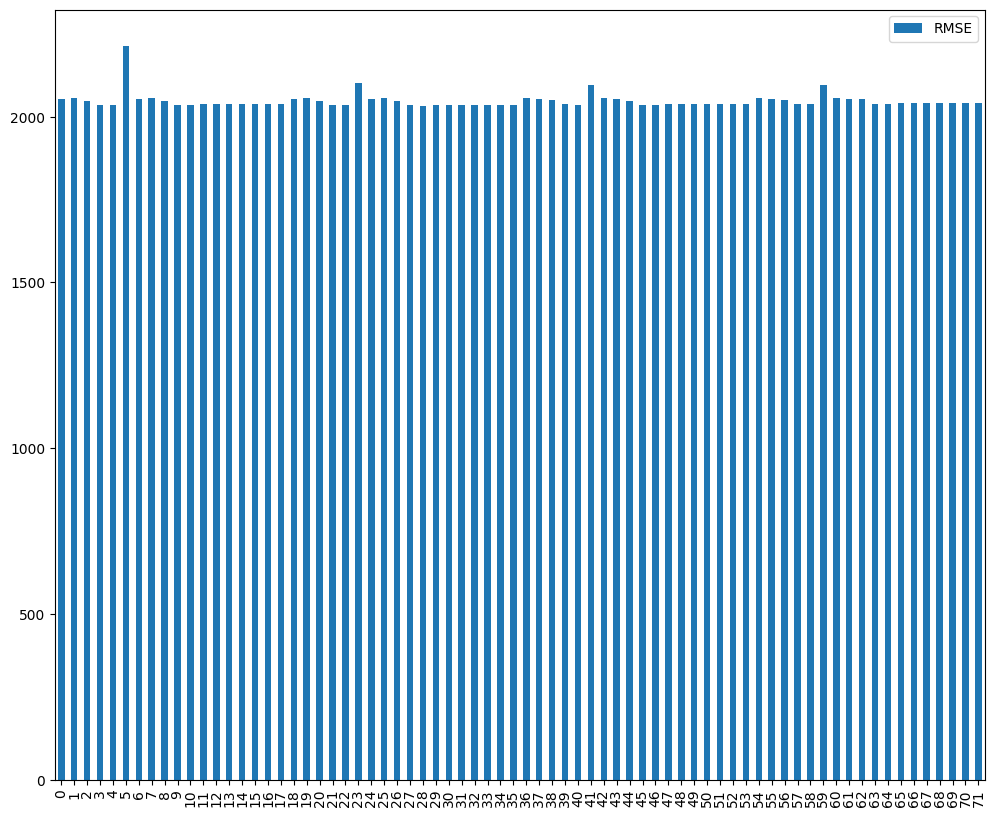

In [ ]:
pred_df.plot(kind = 'bar', figsize = (12,10))

In [ ]:
#change the problema bit
train_df['prep_time'] = train_df['final_delivery_time'] - train_df['estimated_store_to_consumer_driving_duration']-train_df['estimated_order_place_duration']



In [ ]:
scalers = {
    "standard scaler" : StandardScaler(),
}

feature_sets = {
    "selected_features_40": importances.sort_values(by = 'Gini Importance')[-40:].index.tolist(),
}

In [ ]:
for feature_set_name in feature_sets.keys():
  feature_set = feature_sets[feature_set_name]
  for scaler_name in scalers.keys():
    print(f"-----scaled with {scaler_name}----- included columns are {feature_set_name}")
    print("")
    for model_name in regression_models.keys():
      X = train_df[feature_set].drop(columns = ['estimated_store_to_consumer_driving_duration', 'estimated_order_place_duration'])
      y = train_df['prep_time']

      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
      train_indices = X_train.index
      test_indices = X_test.index

      X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X, y)

      X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 42)
      _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:,0], X_test_scaled, y_test_scaled[:,0], regression_models[model_name], model_name, verbose = False)
      rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, model_name)
      pred_dict["regression_model"].append(model_name)
      pred_dict["feature_set"].append(feature_set_name)
      pred_dict["scaler_name"].append(scaler_name)
      pred_dict["RMSE"].append(rmse_error)

-----scaled with standard scaler----- included columns are selected_features_40

Error = 2055.5126953125 in Ridge
Error = 2063.4648926246837 in DecisionTree
Error = 2045.7569136472903 in RandomForest
Error = 2036.527587890625 in XGBoost
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1163
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 38
[LightGBM] [Info] Start training from score -0.002325
Error = 2035.7053544850594 in LightGBM
Error = 2040.1746826171875 in MLP


#According to above result use LGBM

In [89]:
scalers = {
    "standard scaler" : StandardScaler(),
}

feature_sets = {
    "selected_features_40": importances.sort_values(by = 'Gini Importance')[-40:].index.tolist(),
}

#Use best performing model-LGBM
regression_models = {
    "LGBM": LGBMRegressor(),
}

for feature_set_name in feature_sets.keys():
  feature_set = feature_sets[feature_set_name]
  for scaler_name in scalers.keys():
    print(f"-----scaled with {scaler_name}----- included columns are {feature_set_name}")
    print("")
    for model_name in regression_models.keys():
      X = train_df[feature_set].drop(columns = ['estimated_store_to_consumer_driving_duration', 'estimated_order_place_duration'])
      y = train_df['prep_time']

      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
      train_indices = X_train.index
      test_indices = X_test.index

      X_scaled, y_scaled, X_scaler, y_scaler = scale(scalers[scaler_name], X, y)

      X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 42)
      _, y_predict_scaled, _, _ = make_regression(X_train_scaled, y_train_scaled[:,0], X_test_scaled, y_test_scaled[:,0], regression_models[model_name], model_name, verbose = False)
      rmse_error, y_predict = rmse_with_inv_transform(y_scaler, y_test, y_predict_scaled, model_name)
      pred_dict["regression_model"].append(model_name)
      pred_dict["feature_set"].append(feature_set_name)
      pred_dict["scaler_name"].append(scaler_name)
      pred_dict["RMSE"].append(rmse_error)


-----scaled with standard scaler----- included columns are selected_features_40

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1163
[LightGBM] [Info] Number of data points in the train set: 141656, number of used features: 38
[LightGBM] [Info] Start training from score -0.002325
Error = 2035.7053544850594 in LGBM


In [93]:
#Choose best perform model and extract the predictions for preparation duration
pred_values_dict = {
    "final_delivery_time" : train_df["final_delivery_time"][test_indices].values.tolist(),
    "prep_duration_prediction" : y_predict.tolist(),
    "estimated_store_to_consumer_driving_duration" : train_df["estimated_store_to_consumer_driving_duration"][test_indices].values.tolist(),
    "estimated_order_place_duration" : train_df["estimated_order_place_duration"][test_indices].values.tolist(),
}

In [94]:
#convert it to dataframe from dict
values_df = pd.DataFrame.from_dict(pred_values_dict)
values_df

,final_delivery_time,prep_duration_prediction,estimated_store_to_consumer_driving_duration,estimated_order_place_duration
0,2460.0,[1744.741163160844],380.0,251.0
1,1860.0,[1546.24774485414],747.0,446.0
2,1980.0,[2130.519063487817],543.0,251.0
3,2640.0,[1322.2084647205997],445.0,251.0
4,3600.0,[1939.6962669036725],691.0,446.0
...,...,...,...,...
35409,9600.0,[2647.2156579860184],768.0,446.0
35410,1860.0,[2138.0112972449324],324.0,446.0
35411,2640.0,[1887.0321169434937],791.0,251.0
35412,2220.0,[1922.8678582856496],687.0,251.0


In [101]:
#Sum predictions up with non preparation activities such as order placing and driving
values_df["sum_total_delivery_duration"] = values_df["prep_duration_prediction"].apply(lambda x: sum(x)) + values_df["estimated_store_to_consumer_driving_duration"] + values_df["estimated_order_place_duration"]

In [102]:
values_df

,final_delivery_time,prep_duration_prediction,estimated_store_to_consumer_driving_duration,estimated_order_place_duration,sum_total_delivery_duration
0,2460.0,[1744.741163160844],380.0,251.0,2375.741163
1,1860.0,[1546.24774485414],747.0,446.0,2739.247745
2,1980.0,[2130.519063487817],543.0,251.0,2924.519063
3,2640.0,[1322.2084647205997],445.0,251.0,2018.208465
4,3600.0,[1939.6962669036725],691.0,446.0,3076.696267
...,...,...,...,...,...
35409,9600.0,[2647.2156579860184],768.0,446.0,3861.215658
35410,1860.0,[2138.0112972449324],324.0,446.0,2908.011297
35411,2640.0,[1887.0321169434937],791.0,251.0,2929.032117
35412,2220.0,[1922.8678582856496],687.0,251.0,2860.867858
